## Training the model
I first opt to use Logistic Regression before contemplating more sophisticated models

In [5]:
#Importing libraries for data manipulation
import pandas as pd
import numpy as np
#From sklearn
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc

In [7]:
# Cargar datos preprocesados
X_train_scaled = pd.read_csv("data/processed/X_train_scaled.csv")
X_test_scaled = pd.read_csv("data/processed/X_test_scaled.csv")
y_train = pd.read_csv("data/processed/y_train.csv")
y_test = pd.read_csv("data/processed/y_test.csv")


In [8]:
# Logistic Regression
lr= LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train_scaled,y_train)
# Predicting on the test set
y_pred_lr = lr.predict(X_test_scaled)

# Evaluating the model
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))



C:\Users\Max\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Accuracy: 0.9603256950917116
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.98      0.96     56863
           1       0.98      0.94      0.96     56863

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726



In [9]:
# Evaluating the model with cross-validation
cv_scores = cross_val_score(lr, X_train_scaled, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean Cross-Validation Score:", np.mean(cv_scores))

C:\Users\Max\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Max\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Max\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of 

Cross-Validation Scores: [0.95392445 0.96046427 0.95887053 0.96026643 0.96122225]
Mean Cross-Validation Score: 0.9589495855667594


Evidently, Logistic Regression is a good starting point

I next consider using Random Forest Classifier

In [ ]:
# Random Forest Classifier
rf= RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=5, 
    random_state=42,
    n_jobs=-1
)
#Cross-validation
cv_scores_lr= cross_val_score(rf, X_train_scaled, y_train, cv=5, scoring='f1')
print("Random Forest Classifier Cross-Validation Scores:", cv_scores_lr)
print("Average Cross-Validation Score:", np.mean(cv_scores_lr))

C:\Users\Max\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [ ]:
# I evaluate the model
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
print("Random Forest Classifier Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classifier Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Classifier Accuracy: 0.9855354096688532
Random Forest Classifier Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99     56863
           1       1.00      0.97      0.99     56863

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726



In [ ]:
#Evidently, Random Forest Classifier is a good model for this problem
# In the next step, I will visualize the confusion matrix

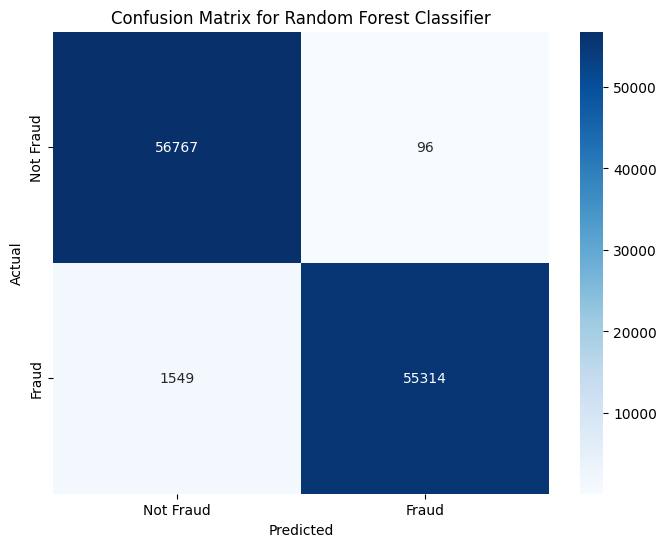

In [ ]:
# Visualizing the confusion matrix

plt.figure(figsize=(8, 6))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.title('Confusion Matrix for Random Forest Classifier')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Evaluating ROC Curve

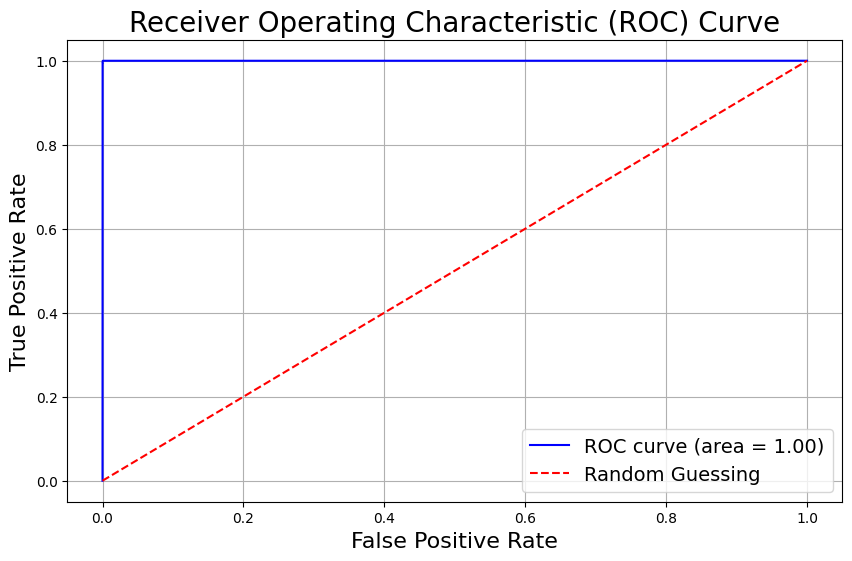

In [ ]:
# To evaluate the model's performance, I will plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, xgb_reduced.predict_proba(X_test_reduced)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (area = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle
='--', label='Random Guessing')
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=20)
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.legend(loc='lower right', fontsize=14)
plt.grid()
plt.show()

In [ ]:
#Analyzing recall, precision, and F1-score
print("XGBoost Classifier Recall:", classification_report(y_test, y_pred_xgb,
    output_dict=True)['1']['recall'])
print("XGBoost Classifier Precision:", classification_report(y_test, y_pred_xgb,
    output_dict=True)['1']['precision'])
print("XGBoost Classifier F1-Score:", classification_report(y_test, y_pred_xgb,
    output_dict=True)['1']['f1-score'])


XGBoost Classifier Recall: 0.9999648277438756
XGBoost Classifier Precision: 0.9991741055739087
XGBoost Classifier F1-Score: 0.9995693102811789


It is evident that the model XGBoost Classfier's improves the performance, being quite better than the Random Forest Classifier's performance. With an AUC of 0.99.

Finally, the model XGBoost Classifier achieves a great accuracy in this dataset. This would be because the model was able to learn the patterns underlying the data, that evidently was no-linear and even with some features removed due to multicollinearity.


---
